working....
k = 2, score = 0.16223992558489375
k = 3, score = 0.21591966205500285
k = 4, score = 0.22534652135569389
k = 5, score = 0.25418714597264586
k = 6, score = 0.26975733675934394
k = 7, score = 0.2770433769549235
k = 8, score = 0.2887366262817887
k = 9, score = 0.23109980933317628


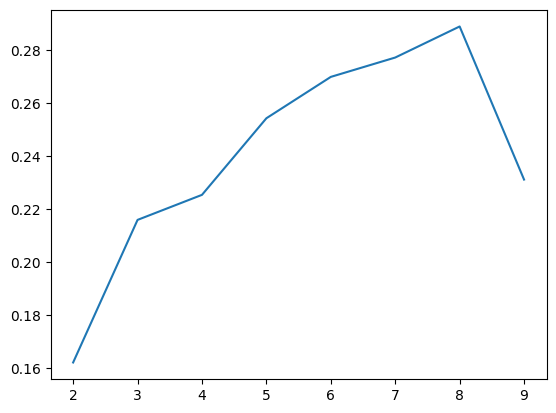

Max score:  0.2887366262817887
Best cluster size:  8


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn import metrics


df = pd.read_csv('shrooms.csv')
df_dummies = pd.get_dummies(df.drop('edibility', axis='columns'))

max_score = 0
scores = []
best_cluster_size = None

print('working....')
for i in range(2,30):
    # The number of clusters are from 2 to 10
    k_means = KMeans(n_clusters=i)

    # Compute k-means clustering using the training instanecs (df_dummies)
    k_means.fit(df_dummies)

    # Compute cluster centers and predict a cluster index for each sample
    cluster = k_means.predict(df_dummies)

    # Selecting a good number of clusters using silhouette analysis
    score = metrics.silhouette_score(df_dummies, cluster)
    scores.append(score)
    print(f"k = {i}, score = {score}")

    # Iteratively select the best score
    if (score > max_score):
        max_score = score
        best_cluster_size = i


plt.plot(range(2,10), scores)
plt.show()

print("Max score: ", max_score)
print("Best cluster size: ", best_cluster_size)

[1 1 1 ... 6 0 6]


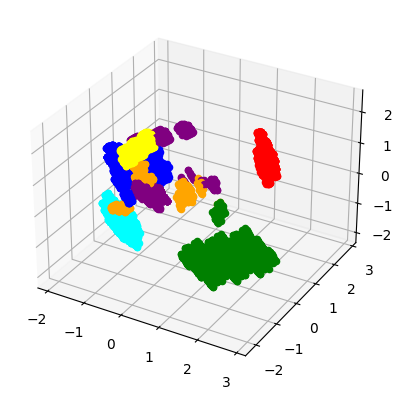

In [11]:
plt.close()

# Number of components to keep
pca = PCA(n_components=3)

# Fit the model with df_dummies and apply the dimensionality reduction on df_dummies    .
df_pca = pca.fit_transform(df_dummies)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# 8 was the ideal number of clusters in task a)
k_means = KMeans(n_clusters=7)
k_means.fit(df_dummies)
clusters = k_means.predict(df_dummies)

colors = ['green',
          'blue',
          'red',
          'yellow',
          'cyan',
          'orange',
          'purple',
          'grey',
          'pink']
print(clusters)

for i, e in enumerate(df_pca):
    ax.scatter(*e, color=colors[clusters[i]])

plt.show()